In [12]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import os
from sklearn.model_selection import train_test_split



model = tf.keras.models.load_model('skin_cancer_model_VGG16_v1.h5')

In [13]:
csv_path = '../isic-data/ISIC_2020_Training_GroundTruth_v2.csv'
df = pd.read_csv(csv_path)

images_dir = '../isic-data/train'

small_metadata, _ = train_test_split(df, test_size=0.9, stratify=df['target'], random_state=42)
train_df, test_df = train_test_split(small_metadata, test_size=0.2, stratify=small_metadata['target'], random_state=42)

def preprocess_image(image_path):
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = img_array / 255.0
    return img_array

test_images = np.array([preprocess_image(os.path.join(images_dir, img_name + '.jpg')) for img_name in test_df['image_name']])
test_labels = np.array(test_df['target'])

21/21 ━━━━━━━━━━━━━━━━━━━━ 289s 14s/step - accuracy: 0.9864 - loss: 0.0740
Loss: 0.09097293019294739
Accuracy: 0.9819004535675049
21/21 ━━━━━━━━━━━━━━━━━━━━ 293s 14s/step
              precision    recall  f1-score   support

      Benign       0.98      1.00      0.99       651
   Malignant       0.00      0.00      0.00        12

    accuracy                           0.98       663
   macro avg       0.49      0.50      0.50       663
weighted avg       0.96      0.98      0.97       663



c:\Users\Westen\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Westen\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Westen\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

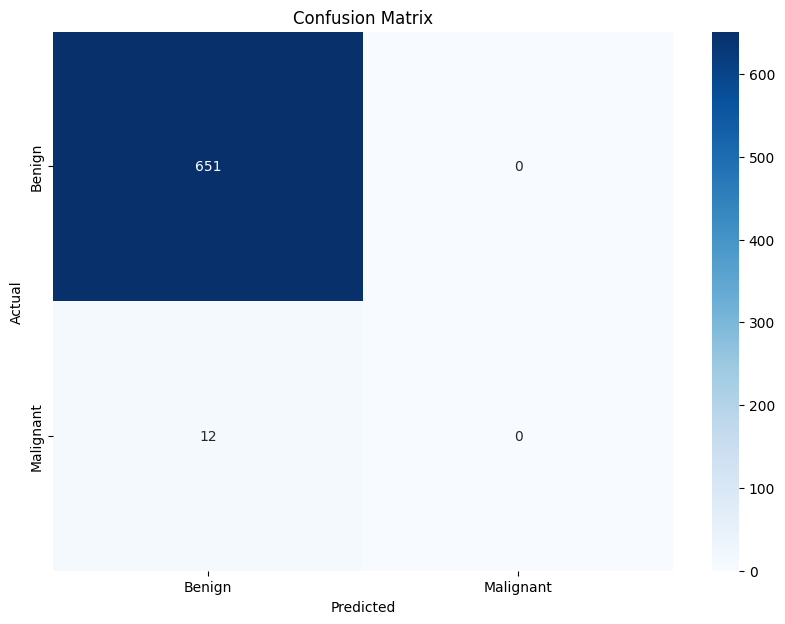

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

loss, accuracy = model.evaluate(test_images, test_labels)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

predictions = model.predict(test_images)
predicted_labels = (predictions > 0.5).astype(int).flatten()

report = classification_report(test_labels, predicted_labels, target_names=['Benign', 'Malignant'])
print(report)

conf_matrix = confusion_matrix(test_labels, predicted_labels)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()